## Create radarcharts from ScandEval

In [2]:
import json
import pandas as pd

file = "../scandeval_benchmark_results.jsonl"
with open(file, 'r') as f:
    json_list = list(f)

data = [json.loads(item) for item in json_list]
df = pd.DataFrame(data)

def format_mean_se(mean, se):
    return f"{mean:.2f}"

results = []
for _, row in df.iterrows():
    task = row['task']
    model = row['model']
    dataset_languages = ', '.join(row['dataset_languages'])
    results_dict = row['results']['total']

    formatted_metrics = {}
    for metric, value in results_dict.items():
        if "_se" in metric:
            continue
        se_metric = metric + "_se"
        formatted_metrics[metric] = format_mean_se(value, results_dict[se_metric])

    # Model Information
    num_params = f"{int(row['num_model_parameters']):,}"
    max_seq_length = row['max_sequence_length']
    vocabulary_size = row['vocabulary_size']
    generative = row['generative']
    few_shot = row['few_shot']
    validation_split = row['validation_split']
    scandeval_version = row['scandeval_version']
    dataset = row['dataset']

    results.append({
        'Dataset': dataset,
        'Task': task,
        'Language(s)': dataset_languages,
        'Model': model,
        'Results': formatted_metrics,
        'Model Information': {
            'Number of Parameters': num_params,
            'Max Sequence Length': max_seq_length,
            'Vocabulary Size': vocabulary_size,
            'Generative': generative,
            'Few-shot': few_shot,
            'Validation Split': validation_split,
            'Scandeval Version': scandeval_version
        }
    })

x = 9
print(results[x*8]['Model'])

merged-models/gpt-sw3-6.7b-hopkok-v2-nosystem-DPO


In [228]:
openhermes = [results[x*8 + i]['Results'].values() for i in range(8)]
openhermes = [list(map(float, x)) for x in openhermes]
openhermes = [x[0] for x in openhermes][:-1]
print(openhermes)

[74.12, 27.72, 8.5, 49.78, 56.78, 6.9, 30.75]


In [225]:
hopkokv3 = [results[x*8 + i]['Results'].values() for i in range(8)]
hopkokv3 = [list(map(float, x)) for x in hopkokv3]
hopkokv3 = [x[0] for x in hopkokv3][:-1]
print(hopkokv3)

[74.06, 30.67, 9.02, 49.86, 55.78, 7.18, 29.58]


In [103]:
hopkokv1 = [results[x*8 + i]['Results'].values() for i in range(8)]
hopkokv1 = [list(map(float, x)) for x in hopkokv1]
hopkokv1 = [x[0] for x in hopkokv1][:-1]
print(hopkokv1)

[74.83, 29.27, 9.2, 51.08, 56.18, 5.86, 30.74]


In [123]:
hopkokv2 = [results[x*8 + i]['Results'].values() for i in range(8)]
hopkokv2 = [list(map(float, x)) for x in hopkokv2]
hopkokv2 = [x[0] for x in hopkokv2][:-1]
print(hopkokv2)

[75.55, 27.77, 6.63, 51.28, 49.64, 6.23, 30.62]


In [3]:
gptsw3_6_7b = [77.47, 28.73, 8.78, 50.57, 62.41, 5.23, 5.39]
gptsw3_6_7b_instruct = [56.60, 14.58, 10.92, 50.18, 64.89, 6.16, 10.90]

In [196]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

categories = ['Text Classification (MCC)', 'Information Extraction (Micro-Avg F1)', 'Grammar (MCC)', 'Question Answering (Exact Match)', 'Summarization (BERTScore)', 'Knowledge (MCC)', 'Reasoning (MCC)']
categories = categories + [categories[0]]
hopkokv3 = hopkokv3 + [hopkokv3[0]]
hopkokv2 = hopkokv2 + [hopkokv2[0]]
hopkokv1 = hopkokv1 + [hopkokv1[0]]
gptsw3_6_7b_instruct = gptsw3_6_7b_instruct + [gptsw3_6_7b_instruct[0]]
gptsw3_6_7b = gptsw3_6_7b + [gptsw3_6_7b[0]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=gptsw3_6_7b,
        theta=categories,
        name='GPT-SW3-6.7B-V2'
    ))

fig.add_trace(go.Scatterpolar(
        r=gptsw3_6_7b_instruct,
        theta=categories,
        # fill='toself',
        name='GPT-SW3-6.7B-V2-INSTRUCT'
    ))


fig.add_trace(go.Scatterpolar(
        r=hopkokv1,
        theta=categories,
        name='HOPKOK-V1'
    ))

fig.add_trace(go.Scatterpolar(
        r=hopkokv2,
        theta=categories,
        name='HOPKOK-V2'
    ))

fig.add_trace(go.Scatterpolar(
        r=hopkokv3,
        theta=categories,
        name='HOPKOK-V3'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 80]
        )),
    showlegend=True,
    width=1000,  # Increase the width
    height=800,  # Increase the height
    font=dict(size=16),
    # margin=dict(l=150, r=150, t=80, b=80),
    legend=dict(
        orientation="v",  # Horizontal legend
        yanchor="bottom",
        y=1.1,  # Adjust vertical position
        xanchor="right",
        x=0.2  # Adjust horizontal position
    )
)

fig.show()


## Charts for BiaSWE

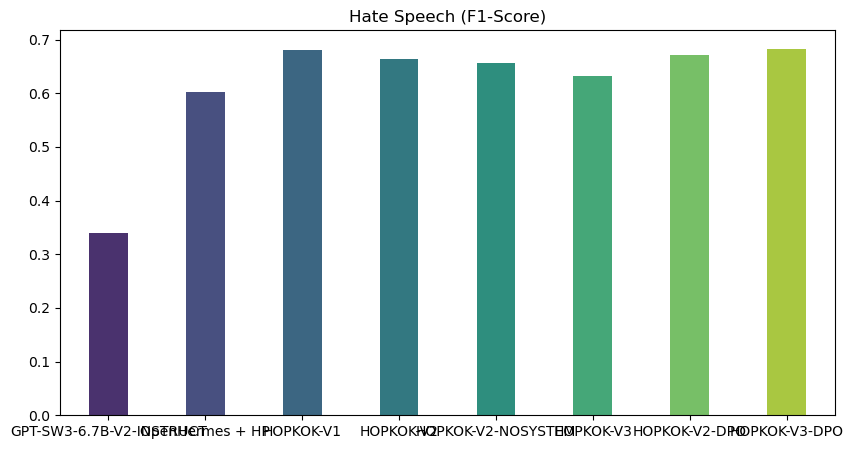

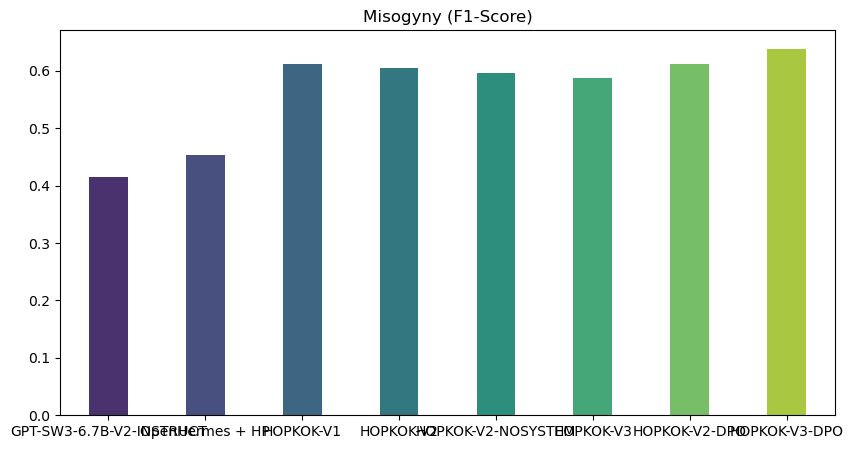

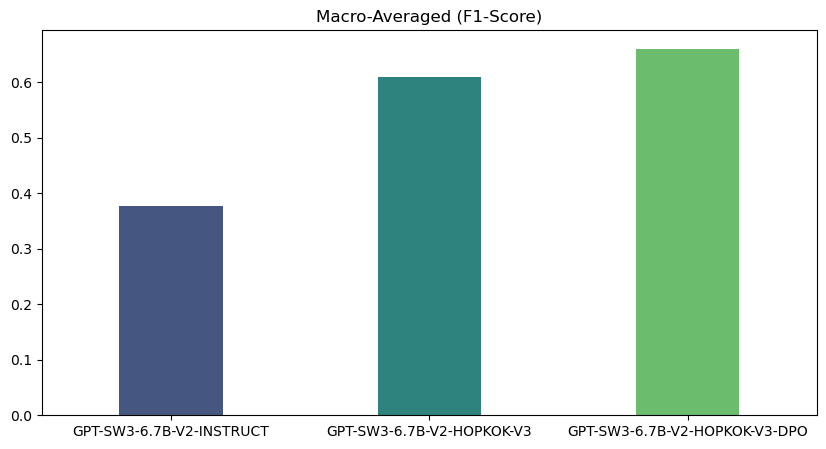

In [28]:
gptsw3_6_7b_instruct = [0.3392284014795779, 0.4148054465198028]
openhermes = [0.6030169618506448, 0.4536953126958451]
hopkokv1 = [0.6797393539922577, 0.6114804907253755]
hopkokv2 = [0.6643879741484077, 0.60572904356519]
hopkokv2_nosystem = [0.6561754117453414, 0.5969764521717035]
gptsw3_6_7b_hopkokv3 = [0.6330294388417612, 0.5878238579124051]
hopkokv2_dpo = [0.6721525389592762, 0.6119364434257438]
gptsw3_6_7_hopkokv3_dpo = [0.6831262134969214, 0.6388888888888888]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = {'Values': [gptsw3_6_7b_instruct[0], 
                   openhermes[0],
                   hopkokv1[0],
                   hopkokv2[0],
                   hopkokv2_nosystem[0],
                   gptsw3_6_7b_hopkokv3[0],
                   hopkokv2_dpo[0], 
                   gptsw3_6_7_hopkokv3_dpo[0]],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT',
                  'OpenHermes + HP',
                  'HOPKOK-V1',
                  'HOPKOK-V2',
                  'HOPKOK-V2-NOSYSTEM',
                  'HOPKOK-V3',
                  'HOPKOK-V2-DPO',
                  'HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Hate Speech (F1-Score)')
plt.show()

data = {'Values': [gptsw3_6_7b_instruct[1], 
                   openhermes[1],
                   hopkokv1[1],
                   hopkokv2[1],
                   hopkokv2_nosystem[1],
                   gptsw3_6_7b_hopkokv3[1],
                   hopkokv2_dpo[1], 
                   gptsw3_6_7_hopkokv3_dpo[1]],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT',
                  'OpenHermes + HP',
                  'HOPKOK-V1',
                  'HOPKOK-V2',
                  'HOPKOK-V2-NOSYSTEM',
                  'HOPKOK-V3',
                  'HOPKOK-V2-DPO',
                  'HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Misogyny (F1-Score)')
plt.show()

# data = {'Values': [np.average(gptsw3_6_7b_instruct), np.average(gptsw3_6_7b_hopkokv3), np.average(gptsw3_6_7_hopkokv3_dpo)],
#         'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

# plt.figure(figsize=(10, 5))
# sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
# plt.title('Macro-Averaged (F1-Score)')
# plt.show()

In [ ]:
gptsw3_6_7b_instruct = 0.372
gptsw3_6_7b_hopkokv3 = 0.42000000000000004
gptsw3_6_7_hopkokv3_dpo = 0.44333333333333336

data = {'Values': [gptsw3_6_7b_instruct, gptsw3_6_7b_hopkokv3, gptsw3_6_7_hopkokv3_dpo],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Joint Acurracy')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the first bar chart
data_hate_speech = {'Values': [0.3392284014795779, 0.6030169618506448, 0.6797393539922577, 0.6643879741484077, 0.6561754117453414, 0.6330294388417612, 0.6721525389592762, 0.6831262134969214],
                    'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'OpenHermes + HP', 'HOPKOK-V1', 'HOPKOK-V2', 'HOPKOK-V2-NOSYSTEM', 'HOPKOK-V3', 'HOPKOK-V2-DPO', 'HOPKOK-V3-DPO']}

# Data for the second bar chart
data_misogyny = {'Values': [0.4148054465198028, 0.4536953126958451, 0.6114804907253755, 0.60572904356519, 0.5969764521717035, 0.5878238579124051, 0.6119364434257438, 0.6388888888888888],
                 'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'OpenHermes + HP', 'HOPKOK-V1', 'HOPKOK-V2', 'HOPKOK-V2-NOSYSTEM', 'HOPKOK-V3', 'HOPKOK-V2-DPO', 'HOPKOK-V3-DPO']}

# Convert to DataFrame
df_hate_speech = pd.DataFrame(data_hate_speech)
df_misogyny = pd.DataFrame(data_misogyny)

# Function to create bar charts
def create_bar_chart(dataframe, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Values', data=dataframe, palette='viridis', width=0.6)
    plt.title(title, fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('F1-Score', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Create the bar charts
create_bar_chart(df_hate_speech, 'Hate Speech (F1-Score)')
create_bar_chart(df_misogyny, 'Misogyny (F1-Score)')


In [32]:
import plotly.graph_objects as go
import pandas as pd

# Data for the first bar chart
data_hate_speech = {
    'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'OpenHermes + HP', 'HOPKOK-V1', 'HOPKOK-V2', 'HOPKOK-V2-NOSYSTEM', 'HOPKOK-V3', 'HOPKOK-V2-DPO', 'HOPKOK-V3-DPO'],
    'Values': [0.3392284014795779, 0.6030169618506448, 0.6797393539922577, 0.6643879741484077, 0.6561754117453414, 0.6330294388417612, 0.6721525389592762, 0.6831262134969214]
}

# Data for the second bar chart
data_misogyny = {
    'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'OpenHermes + HP', 'HOPKOK-V1', 'HOPKOK-V2', 'HOPKOK-V2-NOSYSTEM', 'HOPKOK-V3', 'HOPKOK-V2-DPO', 'HOPKOK-V3-DPO'],
    'Values': [0.4148054465198028, 0.4536953126958451, 0.6114804907253755, 0.60572904356519, 0.5969764521717035, 0.5878238579124051, 0.6119364434257438, 0.6388888888888888]
}

# Create a function to generate a bar chart in Plotly
def create_plotly_bar_chart(data, title):
    fig = go.Figure(data=[
        go.Bar(name=model, x=data['Model'], y=data['Values'])
    ])
    fig.update_layout(
        title=title,
        xaxis_title='Model',
        yaxis_title='F1-Score',
        xaxis_tickangle=-45,  # Tilt x-axis labels
        barmode='group',
        template='plotly_white',  # Cleaner design
        width=1000,
        height=600,
        font=dict(size=15),
    )
    fig.show()

# Create the bar charts
create_plotly_bar_chart(data_hate_speech, 'Hate Speech (F1-Score)')
create_plotly_bar_chart(data_misogyny, 'Misogyny (F1-Score)')


In [37]:
import plotly.graph_objects as go

# Combined data for both F1-scores
data = {
    'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'OpenHermes + HP', 'HOPKOK-V1', 'HOPKOK-V2', 'HOPKOK-V2-NOSYSTEM', 'HOPKOK-V3', 'HOPKOK-V2-DPO', 'HOPKOK-V3-DPO'],
    'Hate Speech (F1-Score)': [0.3392284014795779, 0.6030169618506448, 0.6797393539922577, 0.6643879741484077, 0.6561754117453414, 0.6330294388417612, 0.6721525389592762, 0.6831262134969214],
    'Misogyny (F1-Score)': [0.4148054465198028, 0.4536953126958451, 0.6114804907253755, 0.60572904356519, 0.5969764521717035, 0.5878238579124051, 0.6119364434257438, 0.6388888888888888]
}

# Create a bar chart in Plotly
fig = go.Figure()

# Add bars for each F1-Score type
fig.add_trace(go.Bar(
    x=data['Model'], 
    y=data['Hate Speech (F1-Score)'], 
    name='Hate Speech',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=data['Model'], 
    y=data['Misogyny (F1-Score)'], 
    name='Misogyny',
    marker_color='lightsalmon'
))

# Update layout
fig.update_layout(
    title='Comparison of Models on Different F1-Scores',
    xaxis_title='Model',
    yaxis_title='F1-Score',
    barmode='group',  # Group bars together
    template='plotly_white',
    xaxis_tickangle=-45,  # Tilt x-axis labelss
    width=1000,
    height=600,
    legend=dict(title='Metrics'),
    font=dict(size=15),
)

fig.show()


### Trying to create barcharts for ScandeVal

In [23]:
import plotly.graph_objects as go
import plotly.express as px


x_list = [0, 3, 5, 7, 10, 9, 11]
list_of_models = []

for x in x_list:
    new_item = [results[x*8 + i]['Results'].values() for i in range(8)]
    new_item = [list(map(float, x)) for x in new_item]
    new_item = [x[0] for x in new_item][:-1]
    list_of_models.append(new_item)


# Define the metrics and data
metrics = ['Text Classification (MCC)', 'Information Extraction (Micro-Avg F1)', 'Grammar (MCC)', 'Question Answering (Exact Match)', 'Summarization (BERTScore)', 'Knowledge (MCC)', 'Reasoning (MCC)']


# Data for each metric
data = {
    'GPT-SW3-6.7B-V2': gptsw3_6_7b,
    'GPT-SW3-6.7B-V2-INSTRUCT': gptsw3_6_7b_instruct,
    'OpenHermes + HP': list_of_models[0],
    'HOPKOK-V1': list_of_models[1],
    'HOPKOK-V2': list_of_models[2],
    'HOPKOK-V2-NOSYSTEM': list_of_models[3],
    'HOPKOK-V3': list_of_models[4],
    'HOPKOK-V2-DPO': list_of_models[5],
    'HOPKOK-V3-DPO': list_of_models[6], 
}

# Create a bar chart for each metric
for i, metric in enumerate(metrics):
    fig = go.Figure()

    for model, values in data.items():
        fig.add_trace(go.Bar(
            x=[model],
            y=[values[i]],
            name=model,
            marker=dict(color='rgb(147,112,219)')
        ))

    fig.update_layout(
        title=f'Comparison of Models for {metric}',
        xaxis_title='Model',
        yaxis_title=metric,
        showlegend=False,
        width=800,
        height=600,
        font=dict(size=16),
        # margin=dict(l=80, r=80, t=100, b=80)
    )

    fig.show()


In [24]:
import plotly.graph_objects as go
import plotly.express as px

x_list = [0, 3, 5, 7, 10, 9, 11]
list_of_models = []

for x in x_list:
    new_item = [results[x*8 + i]['Results'].values() for i in range(8)]
    new_item = [list(map(float, x)) for x in new_item]
    new_item = [x[0] for x in new_item][:-1]
    list_of_models.append(new_item)


# Define the metrics and data
metrics = ['Text Classification (MCC)', 'Information Extraction (Micro-Avg F1)', 'Grammar (MCC)', 'Question Answering (Exact Match)', 'Summarization (BERTScore)', 'Knowledge (MCC)', 'Reasoning (MCC)']

# Data for each metric
data = {
    'GPT-SW3-6.7B-V2': gptsw3_6_7b,
    'GPT-SW3-6.7B-V2-INSTRUCT': gptsw3_6_7b_instruct,
    'OpenHermes + HP': list_of_models[0],
    'HOPKOK-V1': list_of_models[1],
    'HOPKOK-V2': list_of_models[2],
    'HOPKOK-V2-NOSYSTEM': list_of_models[3],
    'HOPKOK-V3': list_of_models[4],
    'HOPKOK-V2-DPO': list_of_models[5],
    'HOPKOK-V3-DPO': list_of_models[6], 
}
# Get a color scale from Plotly Express
color_scale = px.colors.qualitative.Plotly

# Create the grouped bar chart
fig = go.Figure()

# Add a bar for each model and metric
for j, (model, values) in enumerate(data.items()):
    fig.add_trace(go.Bar(
        x=metrics,
        y=values,
        name=model,
        marker_color=color_scale[j % len(color_scale)]
    ))

# Update the layout
fig.update_layout(
    title='Comparison of Models Across Metrics',
    xaxis_title='Metrics',
    yaxis_title='Score',
    barmode='group',  # Group bars together
    width=1200,
    height=600,
    font=dict(size=16),
    margin=dict(l=80, r=80, t=100, b=80)
)

fig.show()


## SweSAT Charts

In [42]:
import json
import pandas as pd
import plotly.graph_objects as go

# Load the JSONL data
data = []
with open('../evaluation/hp-verbal-benchmark/hp-benchmark-results.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Process the data to extract LÄS scores for 0-shot and 5-shot
models = {}
for entry in data:
    model = entry['model']
    n_shot = entry['n-shot']
    läs_score = entry['avg_ord']
    
    if model not in models:
        models[model] = {'0-shot': None, '5-shot': None}
    
    if n_shot == 0:
        models[model]['0-shot'] = läs_score
    elif n_shot == 5:
        models[model]['5-shot'] = läs_score

# Prepare data for the plot
model_names = list(models.keys())
zero_shot_scores = [models[model]['0-shot'] for model in model_names]
five_shot_scores = [models[model]['5-shot'] for model in model_names]

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=model_names,
    y=zero_shot_scores,
    name='0-shot',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=five_shot_scores,
    name='5-shot',
    marker_color='lightsalmon'
))

# Update layout
fig.update_layout(
    title='ORD Scores Comparisons for 0-shot and 5-shot',
    xaxis_title='Model',
    yaxis_title='Avg ORD Score',
    barmode='group',  # Group bars together
    template='plotly_white',
    xaxis_tickangle=-45,  # Tilt x-axis labels
    width=1000,
    height=600,
    legend=dict(title='No. of Shots'),
)

fig.show()


In [44]:
import json
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the JSONL data
data = []
with open('../evaluation/hp-verbal-benchmark/hp-benchmark-results.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Process the data to extract ORD scores for 0-shot and 5-shot
models = {}
for entry in data:
    model = entry['model']
    n_shot = entry['n-shot']
    ord_scores = entry['ord']
    
    if model not in models:
        models[model] = {'0-shot': [], '5-shot': []}
    
    if n_shot == 0:
        models[model]['0-shot'].extend(ord_scores)
    elif n_shot == 5:
        models[model]['5-shot'].extend(ord_scores)

# Prepare data for the plot
model_names = list(models.keys())
zero_shot_means = [np.mean(models[model]['0-shot']) for model in model_names]
zero_shot_stddevs = [np.std(models[model]['0-shot']) for model in model_names]
five_shot_means = [np.mean(models[model]['5-shot']) for model in model_names]
five_shot_stddevs = [np.std(models[model]['5-shot']) for model in model_names]

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=model_names,
    y=zero_shot_means,
    name='0-shot',
    marker_color='indianred',
    error_y=dict(type='data', array=zero_shot_stddevs)
))

fig.add_trace(go.Bar(
    x=model_names,
    y=five_shot_means,
    name='5-shot',
    marker_color='lightsalmon',
    error_y=dict(type='data', array=five_shot_stddevs)
))

# Update layout
fig.update_layout(
    title='ORD Scores Comparisons for 0-shot and 5-shot with Standard Deviations',
    xaxis_title='Model',
    yaxis_title='Avg ORD Score',
    barmode='group',  # Group bars together
    template='plotly_white',
    xaxis_tickangle=-45,  # Tilt x-axis labels
    width=1000,
    height=600,
    legend=dict(title='Shot Type')
)

fig.show()
